## SVM
- Efficient when data is sparse
- Only a subset of the features in the learning space is used to represent the decision surface 


In [19]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
from sklearn.datasets import load_iris
iris = load_iris()
## print description
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [18]:
print(faces.keys())
print(faces.data.shape)
print(faces.images.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400, 64, 64)


===> We don't need to normalize the data since its features are real and between 0 and 1


### Plot faces

In [60]:
def print_face(images,target,number):
        ## images = images, 
        ## target = target value, 
        ## number= number of figs we are going to plot
        fig = plt.figure(figsize=(12,12))
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1,
                            hspace = 0.05,wspace=0.05)
        for _ in range(number):
            p = fig.add_subplot(10,10,_+1,xticks=[], yticks=[])
            p.imshow(images[_],cmap=plt.cm.bone)
            
            ## label figs with target values
            p.text(0,10,str(target[_]))
            p.text(0,60,str(_))
    

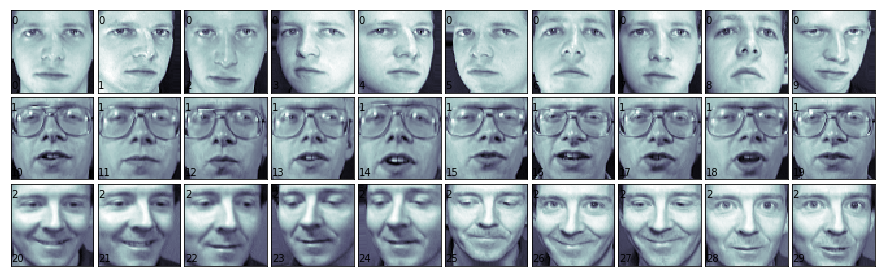

In [61]:
print_face(faces.images,faces.target,30)

In [72]:
from sklearn.svm import SVC

## create an SVM classifier with linear kernel
svc_clf = SVC(kernel='linear')

In [69]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from scipy.stats import sem
X_train, X_test, y_train, y_test = train_test_split(
       faces.data, faces.target, test_size=0.25, random_state=0)

### K-Folds
class sklearn.model_selection.KFold(n_splits = some_integer, shuffle = True_OR_False, random_state = None_or_some_Random_State_Instance)

- n_splits : 
    - int, default=3 (willchange to 5 in ver.0.22)
    - Number of folds. Must be at least 2.
   
- shuffle : 
    - boolean, optional
    - Whether to shuffle the data before splitting into batches.

- random_state : 
    - int, RandomState instance or None, optional, default=None
    - If int, random_state is the seed used by the random number generator; 
    - If RandomState instance, random_state is the random number generator; 
    - If None, the random number generator is the RandomState instance used by np.random. Used when shuffle == True.

In [91]:
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(K, shuffle=True, random_state=None)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
    np.mean(scores), sem(scores)))

In [92]:
evaluate_cross_validation(svc_clf, X_train, y_train, 5)

[0.96666667 0.88333333 0.95       0.95       0.86666667]
Mean score: 0.923 (+/-0.020)


===> What this result means: Cross validation with 5 folds obtains results with an accuracy of 0.923 +/-0.02

### Fit the classifier with training data

In [103]:
from sklearn import metrics
svc_clf.fit(X_train, y_train)
print( "Accuracy on training set: \n", svc_clf.score(X_train, y_train))
print( "Accuracy on test set: \n", svc_clf.score(X_test, y_test))

y_prediciton = svc_clf.predict(X_test)

## Classification Report
print ("classification report:\n", 
       metrics.classification_report(y_test, y_prediciton))
## Confusion Matrix
print ("confusion matrix:\n",
       metrics.confusion_matrix(y_test, y_prediciton))


Accuracy on training set: 
 1.0
Accuracy on test set: 
 0.99
classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00       

## Implementation 
Followed [Sentdex's tutorial](https://www.youtube.com/watch?v=yrnhziJk-z8&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=28)  20-29

In [106]:
from matplotlib import style
style.use('ggplot')

In [265]:
class SVM_implemented:
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors={1:'red',-1:"blue"}
        if self.visualization:
            self.fig = plt.figure()
            self.axis = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        
        self.data=data
        
        #{ ||w||:[w,b] }
        opt_dict = {}
        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]
        
        step_sizes = self.get_train_step()
        
        
        ## the lastets optimum is just max feature times 10.
        latest_optimum = self.max_feature_value*10
        
        b_range_multiple = 2
        b_multiple = 5
        
        for step in step_sizes:
            w=np.array([latest_optimum,latest_optimum])
            optimized=False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for _  in self.data:
                            for xi in self.data[_]:
                                yi = _
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    ## mathematically same as w-[step,step]
                    ## if w = [5,5] and step = 1, 
                    ## w-step = [5,5]-[1,1]=[4,4]
                    w=w-step
                    
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            
            latest_optimum=opt_choice[0][0]+step*2                               
        
    
    def predict(self,features):
        
        ## sign(X.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        
        if classification!=0 and self.visualization:
            self.axis.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    
    def visualize(self):
        
        [[self.axis.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
            
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #(w.x+b)=1
        #positive hyperplane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.axis.plot([hyp_x_min,hyp_x_max],[psv1,psv2])
        
        #(w.x+b)=-1
        #negative hyperplane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.axis.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])
        
        #(w.x+b)=0
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.axis.plot([hyp_x_min,hyp_x_max],[db1,db2],"g--")
        
        plt.show()
        
        
    def get_train_step(self):
        ## create a list to find the maximum and minimum of the list
        all_data=[]
        for _  in self.data:
            for featureset in self.data[_]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value=max(all_data)
        self.min_feature_value=min(all_data)
        ## release memory
        all_data=None
        
        step_sizes = [self.max_feature_value*0.1,
                     self.max_feature_value*0.01,
                     self.max_feature_value*0.001]
        
        return step_sizes
    
    

In [266]:
data_dict = {-1:np.array([[1,7],
                         [2,8],
                         [3,8],]),
            1:np.array([[5,1],
                      [6,-1],
                      [7,3],])}

optimized a step
optimized a step
optimized a step


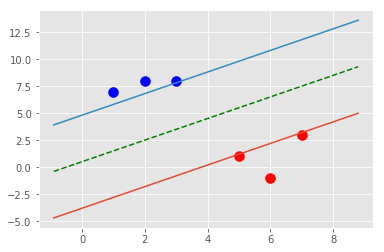

In [274]:
svm = SVM_implemented()
svm.fit(data = data_dict)
svm.visualize()

optimized a step
optimized a step
optimized a step
[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


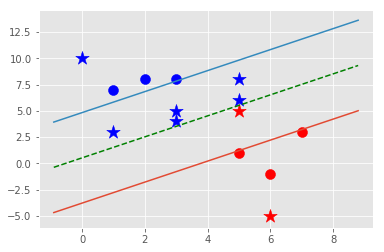

In [277]:
svm2 = SVM_implemented()
svm2.fit(data = data_dict)
predict = [[0,10],
          [1,3],
          [3,4],
          [3,5],
          [5,5],
          [5,6],
          [6,-5],
          [5,8]]
result = []
for p in predict:
    r = svm2.predict(p)
    result.append(r)
print(result)
svm2.visualize()